### 1. import packages
part of the imports include IRA which has a class **GB_data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IRA import Gb_data

### 2. instantiante 2018 and 2019 data

In [2]:
data_18 = Gb_data(2018,4)
data_19 = Gb_data(2019,4)

### 3. apply relevenat methods
**available methods** 
* premium( )
* market_share( ) 
* loss_ratio( ) 
* claims_paid( )
* underwriting_profits( )
* claims_incurred( )
* profit_loss_account( )
* revenue_account( )
* bal_sheet_account( )

#### apply premium and market_share

In [3]:
prem_18 = data_18.premium()
prem_19 = data_19.premium()
ms_18 = data_18.market_share()
ms_19 = data_19.market_share()

#### inspect data 

In [4]:
prem_18.head()

,Aviation,Engineering,Fire Domestic,Fire Industrial,Liability,Marine,Motor Private,Motor Commercial,Personal Accident,Theft,Workmens' Compensation,Medical,Miscellaneous
Company,,,,,,,,,,,,,
AAR,0,190,1405,1477,3946,-1362,0,0,34334,1782,43457,5498241,25478
AFRICAN MERCHANT,0,148128,3190,368933,20442,13075,771838,595915,66369,33611,93801,0,63960
AIG,18291,33097,102232,779476,599074,45899,929092,202110,245338,339377,340730,0,0
ALLIANZ,31704,37855,24544,102415,103861,88147,118977,81583,3098,18934,54544,3253,34943
APA,35263,165893,84222,734627,84613,201715,1384567,1511590,190029,222051,637256,4037263,269898


### 4. prepare plotting data

data to be used in the bars

In [5]:
x = np.arange(1,6)
y = prem_19['Motor Private'].sort_values(ascending=False).head() # top 5 2019 premium
x_ticks = list(y.index)
z = prem_18['Motor Private'].loc[x_ticks]                        # compare 2018 premium for the same companies in top5

data to be used in annotations

In [6]:
y_1 = ms_19['Motor Private'].loc[x_ticks]  
z_1 = ms_18['Motor Private'].loc[x_ticks]

### 5. plotting top 5 companies by premium per class
standard graph with the bars showing premium amount in M.  
annotations show market share

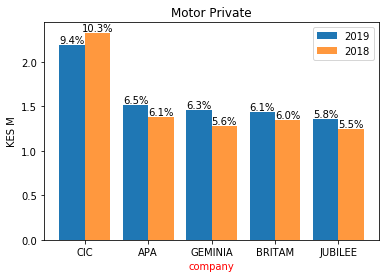

In [7]:
width = 0.4
plt.bar(x-width/2,np.array(y)/1e6,width = width,label='2019')
plt.bar(x+width/2,np.array(z)/1e6,width = width,label='2018',alpha=0.8)

for i,v in enumerate(y):
    plt.annotate("%1.1f"%y_1[i]+ '%',(1+i-width/2,v/1e6),ha='center',va='bottom')
for i,v in enumerate(z):
    plt.annotate("%1.1f"%z_1[i]+ '%',(1+i+width/2,v/1e6),ha='center',va='bottom')

plt.xticks(x,x_ticks)
plt.xlabel('company', color = 'r')
plt.ylabel('KES M')
plt.legend()
plt.title(y.name)
plt.show()